# Customer Churn Analysis

This notebook performs a Detailed Explaratory Data Analysis (EDA) on the Customer Churn Dataset.

Here, We will Expore, Clean and Analyse the Dataset, Perform Statistical Tests and Derive Business Insights.

This notebook includes:
- Data loading & overview
- Data cleaning & preprocessing
- Univariate analysis (numerical & categorical)
- Bivariate analysis
- Multivariate analysis (correlation, PCA)
- Insights.

#### 1) Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### 2) Loading The Dataset:

In [2]:
df = pd.read_csv('CustomerChurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Stripping Column Names of Any Extra Spaces (Just in Case):

df.columns = df.columns.str.strip()

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 3) Data Exploration and Cleaning:

In [6]:
# Checking Shape of Data:

df.shape

(7043, 21)

We have 21 Columns and 7043 Records of Customers.

In [7]:
# Checking DataTypes of Columns and if Any Column has Missing Values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, we can see the Issue of 'TotalCharges' column being of Object Datatype Instead of Numeric Datatype.

In [8]:
# Checking Data in TotalCharges Column:

df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

As we can see above, There are 11 records with ' ' in TotalCharges column, which will produce an error if tried to be converted in Numeric Datatype.

In [9]:
# Converting TotalCharges Column to Numeric Datatype, turning ' ' or '' to Null Values:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

errors='coerce' is crucial here. If a value cannot be converted to a number (like an empty string '' or a non-numeric string like 'abc'), it will be replaced with NaN (Not a Number). This prevents a ValueError from being raised.

In [10]:
df['TotalCharges'].dtype

dtype('float64')

In [11]:
# Checking Again for Null / Missing Values:

df.isnull().sum() / len(df) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

As we can see now, TotalCharges have 0.156% of Missing Values Present in it (Result of Converting Empty String ' '/'' to Numeric using coerce argument).

As there are so Few Missing Values in The Column, and we have more than 7000 records, we can safely Delete the Records with Missing Total Charges values.

In [12]:
df.dropna(inplace= True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [14]:
df.isnull().sum() / len(df) * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

After Dropping Rows with Missing Values in Total Charges Column, we still have 7032 Records Available (Losing Only 11 / 0.156% Records).

Now, we have No Missing Values in Our Dataset.

In [15]:
# Checking For Any Duplicate Rows/Records in Data:

df.duplicated().sum()

0

We have No Duplicate Records in Our Dataset.

##### One Step Duplicate and Missing Value Finding:
This steps are Ususally Taken for all The Columns having Missing Values, Duplicate records and Columns having Wrong Datatypes.

Here, we had Problems in Just Column (Total Charges), So we could do Required Changes for That Column Individually.

But, If there are Problems in Many Columns, Which is the case Usually, It's Better to have One Shot Cleaning Process rather than Cleaning Column Individually.

In [16]:
# One Step Cleaning Process:

cleaning_steps_taken = [] # List to Maintain Steps taken While Cleaning Data.

# 1. Removing Duplicates:
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    df = df.drop_duplicates().reset_index(drop= True)
    cleaning_steps_taken.append(f'Removed {duplicate_count} Duplicate Records from Data.')

# 2. Check and Handle Missing Values:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending= False)
missing_dict = missing.to_dict()

# Convert common strings that represent missing values, Example: sometimes ' ' or '' or 'NA' appear; replace common tokens with np.nan:
replace_tokens = ['', ' ', 'NA', 'N/A', 'na', 'n/a', '?', None]

for col in df.select_dtypes(include= ['object']).columns:
    df[col] = df[col].replace(replace_tokens, np.nan)

# Recompute Missing Values After Replacement:
missing_after = df.isnull().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending = False)
missing_after_dict = missing_after.to_dict()

# Cleaning Summary:
cleaning_summary = {
    'Initial Duplicates' : int(duplicate_count),
    'Initial Missing Count' : {k : int(v) for k,v in missing_dict.items()},
    'Post Replace Missing' : {k : int(v) for k,v in missing_after_dict.items()}
}

In [17]:
print(cleaning_steps_taken)

[]


In [18]:
print(cleaning_summary)

{'Initial Duplicates': 0, 'Initial Missing Count': {}, 'Post Replace Missing': {}}


If there are Missing Values Found in this Step, We can Handle them Using Proper Imputation Methods.

#### 4) Univariate Analysis:

##### Numerical Features:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Although SeniorCitizen Column is integer it has values in 0 and 1 only (Describing whether Customer is a Senior Citizen (1) or Not (0)), which is Categorical in Nature.

In [20]:
num_cols = df.drop('SeniorCitizen', axis= 1).select_dtypes(include= [np.number]).columns.tolist()

In [21]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
# Basic Statistics for Numerica Columns:

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


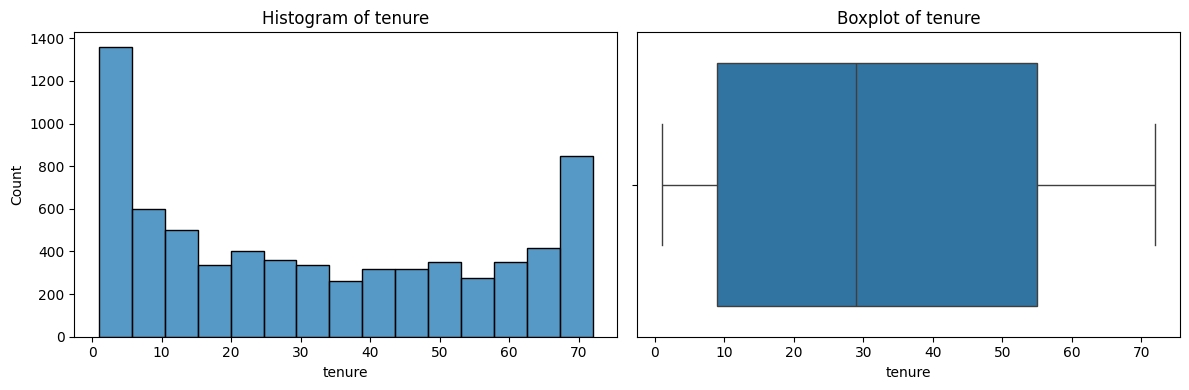

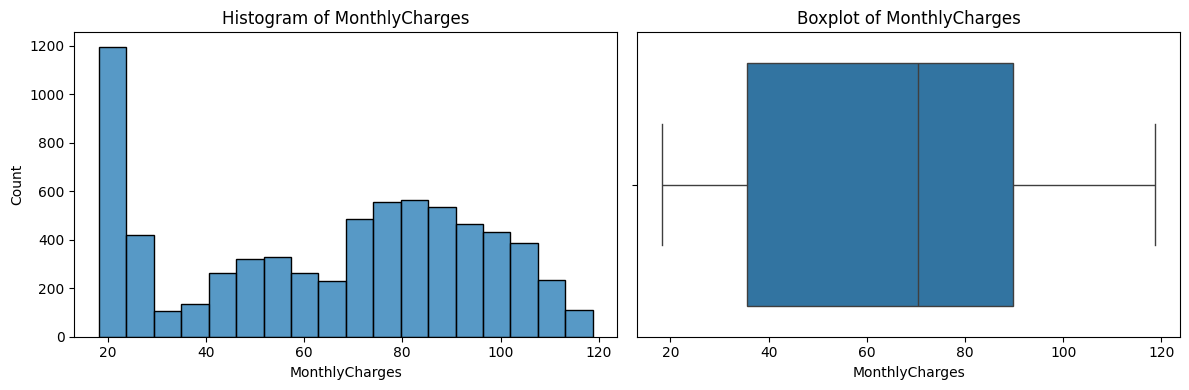

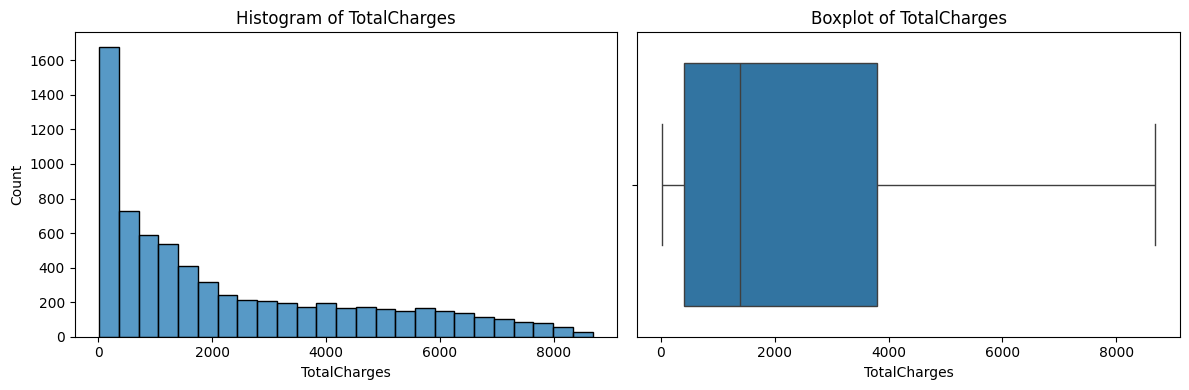

In [23]:
# Histograms and Boxplots for Numeric Columns:

for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols= 2, figsize= (12,4))
    sns.histplot(data= df, x= col, ax= axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    sns.boxplot(data= df, x= col, ax= axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

Insights:

1) Tenure:
   - U-Shaped Distribution: The histogram is bimodal, with large peaks at both the low end (0-5 months) and the high end (around 70 months). This "U" shape suggests the customer base is polarized: there is a large group of new customers and a large group of very loyal, long-term customers, with fewer customers in the middle range.
   - Wide Spread: The boxplot is very wide, and the median is around 30 months. This confirms that the data is highly spread out, without a single central point where most customers cluster.

Insight: The business is good at attracting new customers and retaining a core group for a very long time. However, there might be a "danger zone" in the middle of the customer lifecycle where customers are more likely to leave.

2) Monthly Charges:
   - Left-Skewed with a Spike: The distribution is generally left-skewed. The most prominent feature is a large spike at the low end, around 20. This indicates a significant number of customers are on a basic or low-cost plan. After this spike, the charges are more spread out, with another, broader peak around 80-100.
   - Higher Median: The boxplot shows that the median monthly charge is relatively high (around $70), despite the large number of low-paying customers. This means that more than half of the customers pay a significant amount per month.

Insight: The customer base seems segmented into at least two groups: a large group on an inexpensive entry-level plan and another substantial group paying for more premium, high-cost services.

3) Total Charges:
   - Strongly Right-Skewed: The histogram shows a classic positive (right) skew. The vast majority of customers have lower total charges, with a long tail of a few customers who have paid a very high amount over their lifetime.
   - Low Median, High Range: The boxplot confirms this skew. The box is compressed at the low end, with a median around 1,400. The long whisker extending to the right indicates that while most customers have lower total charges, the maximum values are very high (over 8,000).

Insight: This pattern is expected. New customers (as seen in the tenure chart) will naturally have low total charges. The high values in the long tail are generated by the loyal, long-tenured customers, especially those with high monthly bills.

##### Categorical Features:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

As CustomerID is unique for each Customer, It will not help in Analysis.

In [25]:
cat_cols = df.drop('customerID', axis= 1).select_dtypes(include= ['object', 'category']).columns.tolist()

In [26]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

,count
gender,
Male,3549
Female,3483


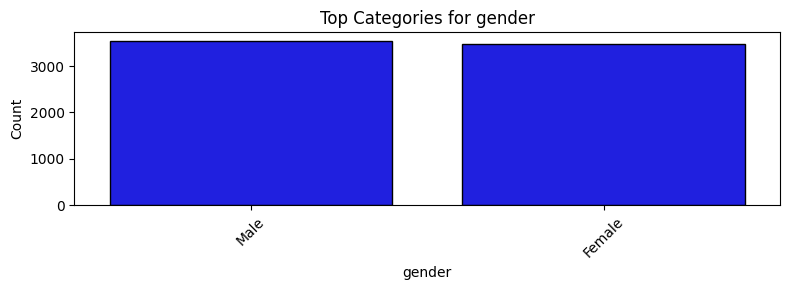

,count
Partner,
No,3639
Yes,3393


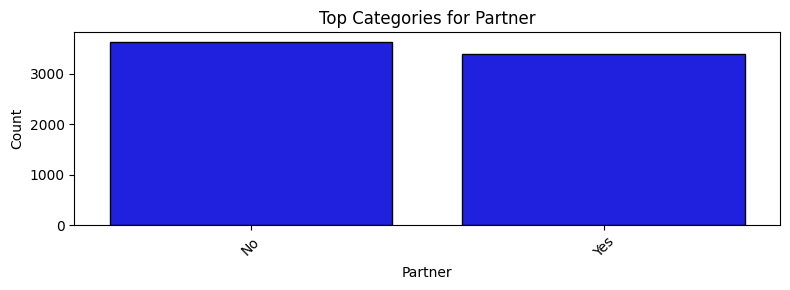

,count
Dependents,
No,4933
Yes,2099


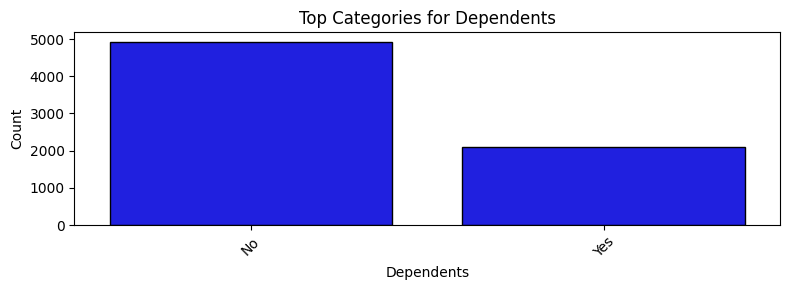

,count
PhoneService,
Yes,6352
No,680


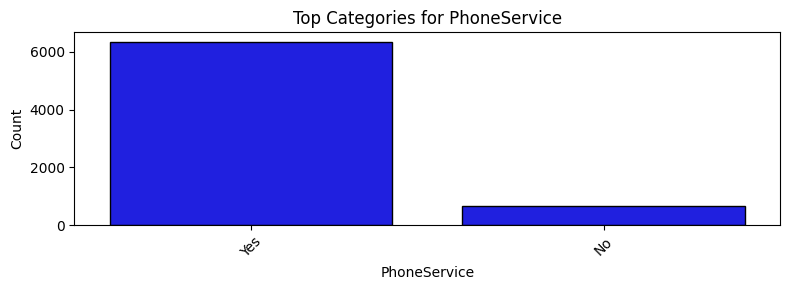

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


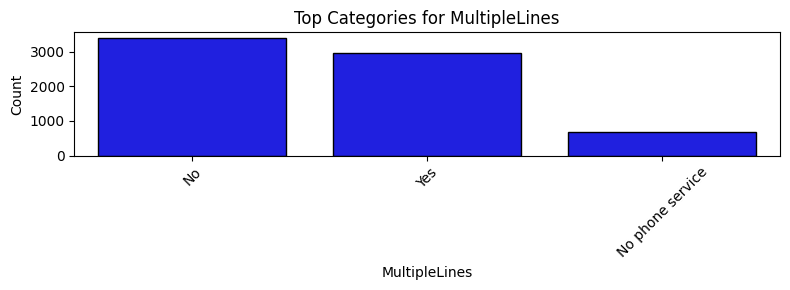

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


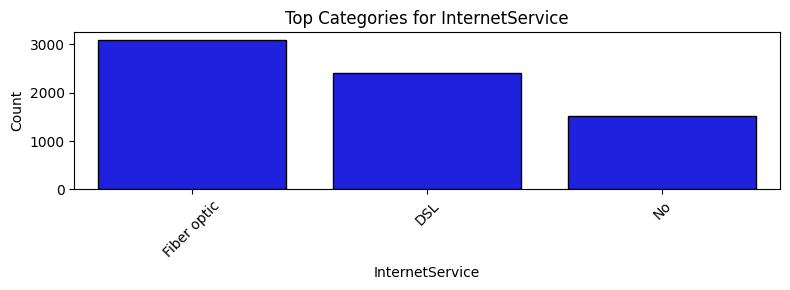

,count
OnlineSecurity,
No,3497
Yes,2015
No internet service,1520


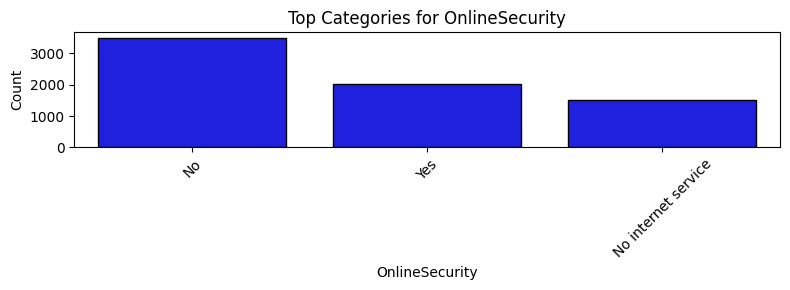

,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520


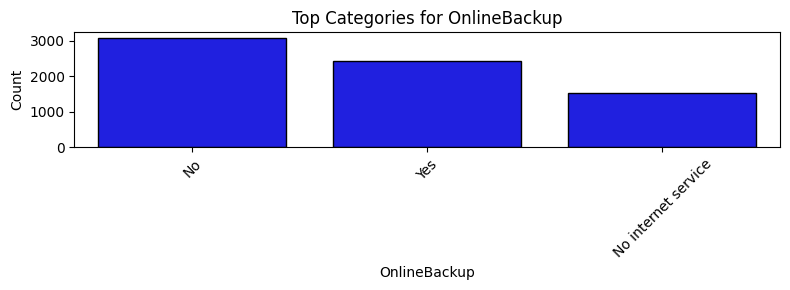

,count
DeviceProtection,
No,3094
Yes,2418
No internet service,1520


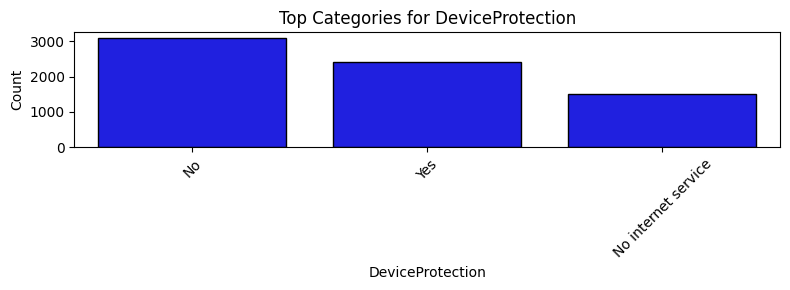

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


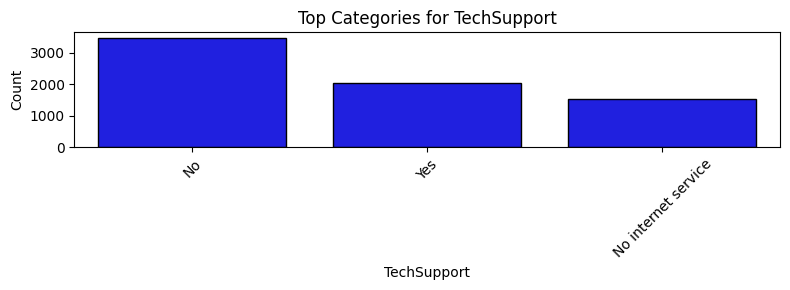

,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520


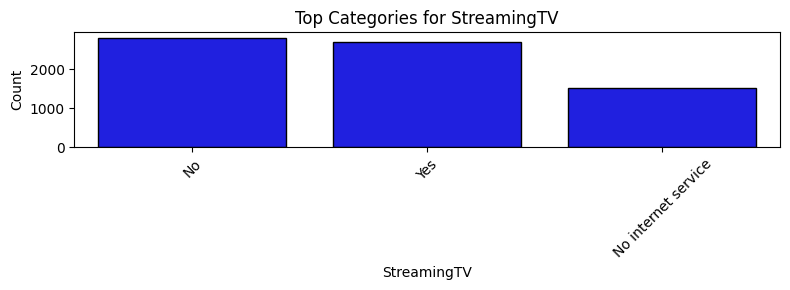

,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520


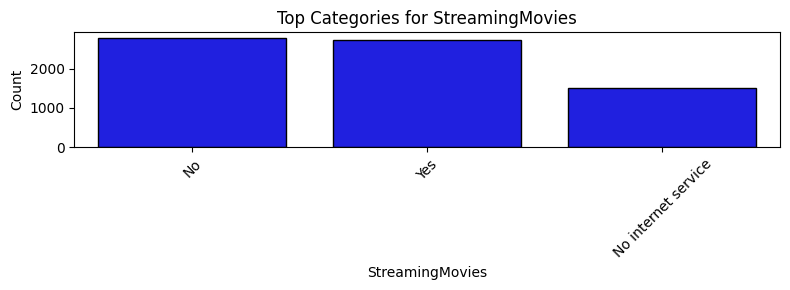

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


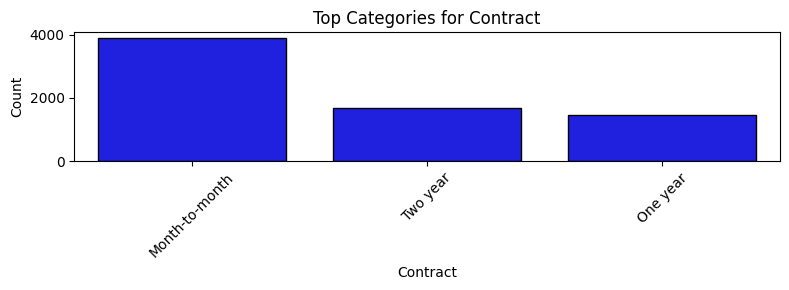

,count
PaperlessBilling,
Yes,4168
No,2864


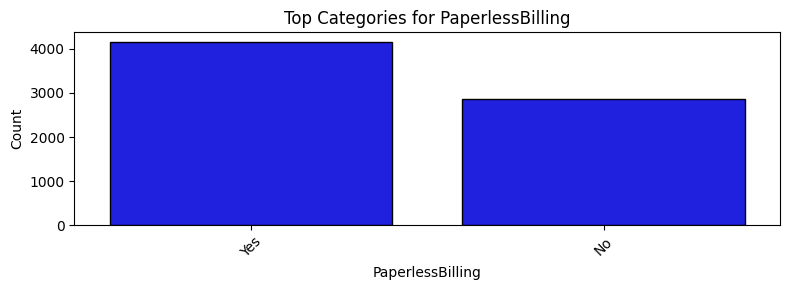

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


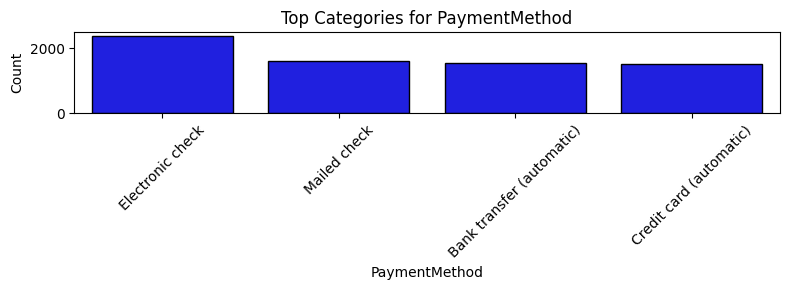

,count
Churn,
No,5163
Yes,1869


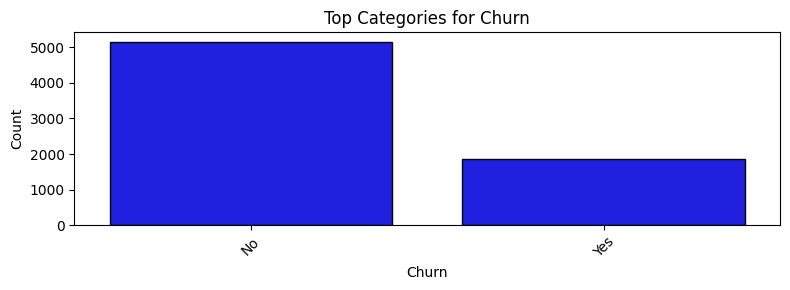

In [27]:
# Frequency counts and bar plots for categorical variables (Showing top 10 Categories in Each Feature):

for col in cat_cols:
    top = df[col].value_counts().head(10)
    display(top.to_frame(name='count'))
    
    # Bar plot
    plt.figure(figsize= (8, 3))
    sns.barplot(x= top.index.astype(str),
               y= top.values,
               color= 'blue',
               edgecolor = 'black')
    plt.title(f'Top Categories for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation= 45)
    plt.tight_layout()
    plt.show()

Insights:

1) Gender:
- Male and female customers are almost equally represented in the dataset.

2) Partner:
- The count for customers without a partner is slightly higher, but both categories are close in magnitude.

3) Dependents:
- A majority of customers do not have dependents.

- A smaller group, less than half, does have dependents.

4) PhoneService:
- The vast majority of customers have phone service.
- Only a small fraction respond "No," indicating limited interest in customers who do not require phone connections with this provider.

5) MultipleLines:
- More customers do not have multiple phone lines, though a significant number do, showing demand for this add-on.
- Customers without phone service make up a small part of this variable's count.

6) InternetService:
- Fiber optic is the most popular connection type, followed by DSL.
- The "No" category represents customers without internet service, a sizable but minority segment.

7) OnlineSecurity:
- A majority of respondents do not have online security service.
- Those who do are fewer, and a consistent "No internet service" group is present.

8) OnlineBackup:
- As with OnlineSecurity, more customers lack this feature than have it.
- The "No internet service" group consistently forms a smaller portion.

9) DeviceProtection:
- The "No" category is highest for this service, though the "Yes" group is considerable.
- "No internet service" remains a minor but steady group across these features.

10) TechSupport:
- Most customers do not have tech support, as indicated by the highest bar for "No" responses.
- The next largest group includes those who answered "Yes," but it is significantly smaller than the "No" group.
- A notable segment reflects "No internet service," indicating some customers do not require this service at all.

11) StreamingTV:
- The counts of "Yes" and "No" for StreamingTV are very close, suggesting a nearly even split between customers who use the service and those who don't.
- "No internet service" is a smaller category, similar to previous tech-related features.

12) StreamingMovies:
- The usage pattern is like StreamingTV, with "Yes" and "No" responses being nearly equal in count.
- Again, a minority of customers fall into the "No internet service" group, showing a similar trend to other internet-dependent services.

13) Contract:
- Month-to-month contracts are most popular.
- Two-year and one-year contracts trail behind, showing a customer base that prefers flexibility.

14) PaperlessBilling:
- Paperless billing is favored by a majority of customers.
- A substantial portion still opts for paper billing, but they are in the minority.

15) PaymentMethod:
- The "Electronic check" method is most popular for payments.
- The three other methods, "Mailed check," "Bank transfer (automatic)," and "Credit card (automatic)," show almost equal use but are less common individually than electronic checks.

16) Churn:
- Most customers have not churned ("No"), but a significant minority have ("Yes").
- The dataset is imbalanced (~27% churn).

#### 5) Bivariate Analysis:

##### Numerical vs Numerical Features (Correlation and Scatter Plot):

In [28]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


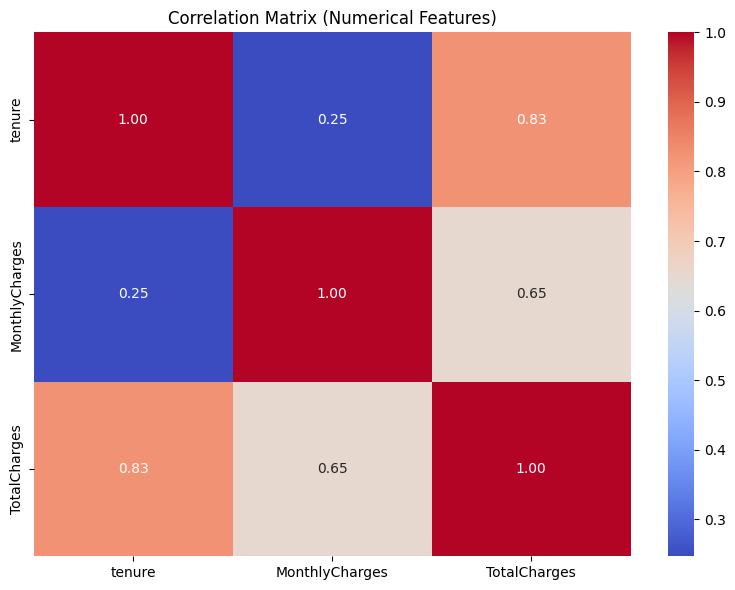

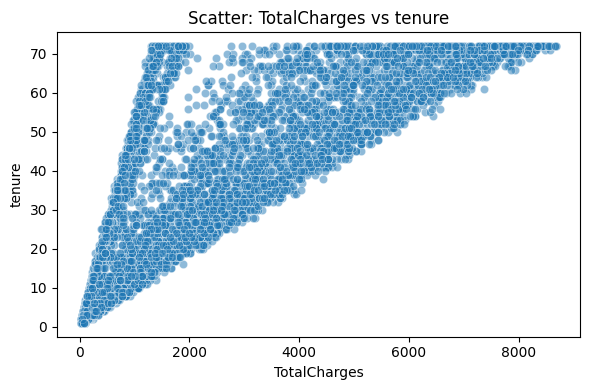

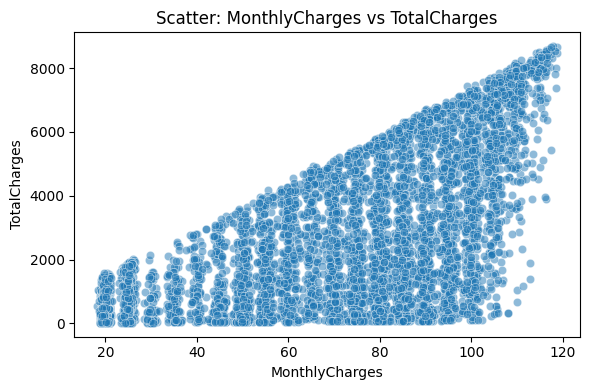

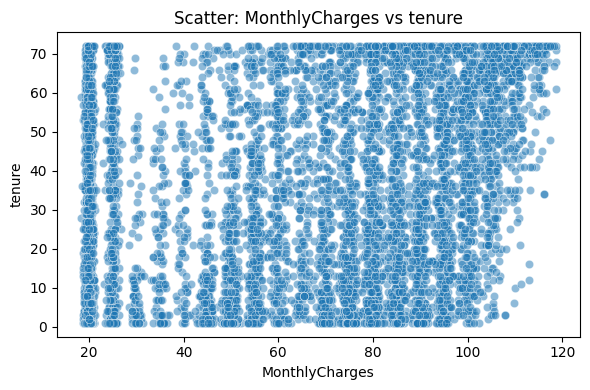

In [29]:
# Bivariate analysis: Numerical vs Numerical (correlation & scatter):

corr_df = df[num_cols].corr()
display(corr_df)

# Correlation Heatmap:
plt.figure(figsize= (8,6))
sns.heatmap(data= corr_df, annot= True, fmt= '.2f', cmap= 'coolwarm', xticklabels= num_cols, yticklabels= num_cols)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

# Scatter Plots For Top Correlated Pairs:
corr_unstacked = corr_df.abs().where(~ np.eye(len(corr_df), dtype= bool)).stack().sort_values(ascending= False)
# Filter pairs to keep only one direction (e.g., a < b)
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) < corr_unstacked.index.get_level_values(1)]
top_pairs = corr_unstacked.head(3).index.tolist()

for a, b in top_pairs:
    plt.figure(figsize= (6,4))
    sns.scatterplot(x= df[a], y= df[b], alpha= 0.5)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(f'Scatter: {a} vs {b}')
    plt.tight_layout()
    plt.show()

Insights:

1) Heatmap of Correlations:

- Tenure vs TotalCharges: There is a strong positive correlation (0.83), meaning customers with higher tenure tend to have higher total charges.

- MonthlyCharges vs TotalCharges: A moderate positive correlation (0.65) is seen, indicating that higher monthly charges contribute to higher total charges, but not as tightly as tenure does.

- Tenure vs MonthlyCharges: The correlation here (0.25) is weak, meaning the amount a customer pays monthly is not strongly related to how long they've been with the company.

2) Scatter Plot:

- Tenure vs TotalCharges: As tenure increases, total charges also increase, but there is a clear banding structure, likely reflecting payment structure or contract rules.
    
- MonthlyCharges vs TotalCharges: There is a widening triangle pattern: for each level of monthly charges, total charges vary widely but increase overall with higher monthly charges.
  
- Tenure vs MonthlyCharges: No strong trend or correlation. The points are widely dispersed, with tenure values (vertical axis) spread fairly evenly across all MonthlyCharges levels (horizontal axis). There’s no clear increasing or decreasing pattern, confirming a weak or nonexistent correlation. There are vertical stripes, meaning certain MonthlyCharges values are much more common. For each MonthlyCharges value, customer tenure can range from very low (new customers) to quite high (longtime customers).

##### Numerical vs Categorical Features (Boxplots):

In [30]:
print(num_cols)
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


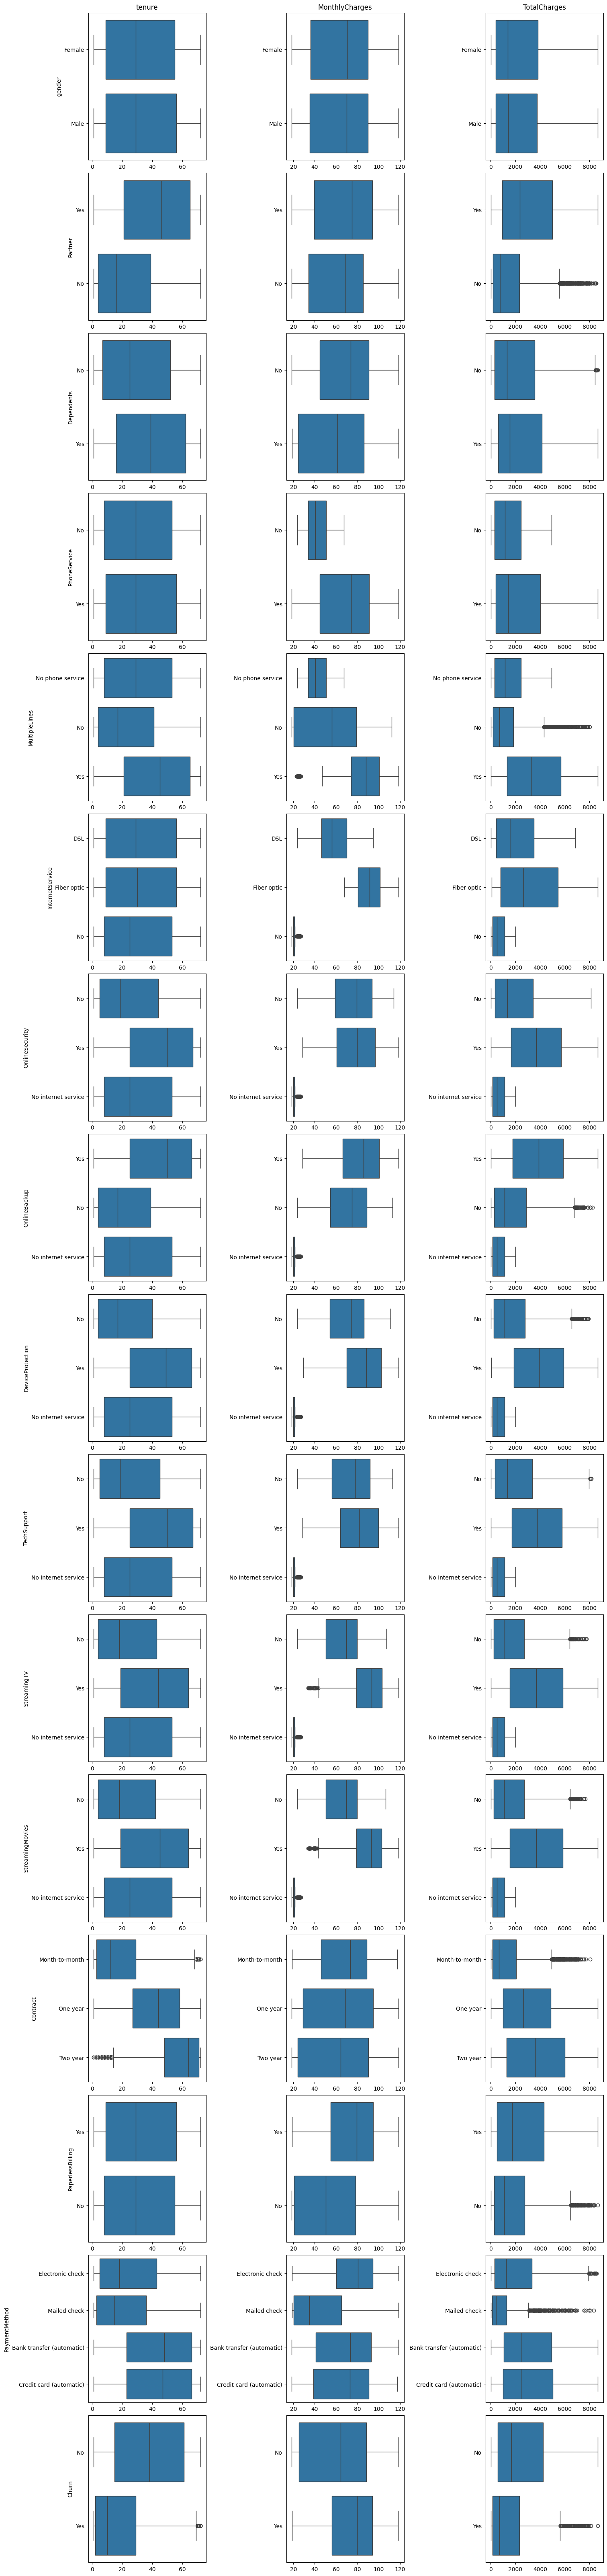

In [31]:
num_num = len(num_cols)
num_cat = len(cat_cols)

fig, axes = plt.subplots(num_cat, num_num, figsize=(5 * num_num, 4 * num_cat), constrained_layout=True)

for i, cat in enumerate(cat_cols):
    for j, num in enumerate(num_cols):
        ax = axes[i, j] if num_cat > 1 else axes[j]  # Handling single row case
        sns.boxplot(x=num, y=cat, data=df, orient='h', ax=ax)
        if i == 0:
            ax.set_title(num)
        if j == 0:
            ax.set_ylabel(cat)
        else:
            ax.set_ylabel('')
        ax.set_xlabel('')

plt.show()

Insights:

1) Gender:
- Distribution of tenure, MonthlyCharges, and TotalCharges is very similar for both Male and Female groups.
- No significant differences are visible, indicating gender does not strongly affect tenure, monthly, or total charges.

2) Partner:
- Customers with and without partners show quite similar distributions for tenure, MonthlyCharges, and TotalCharges.
- Presence of a partner does not appear to have a pronounced effect on spending or duration.

3) Dependents:
- Customers without dependents have a wider spread and higher upper range in tenure compared to those with dependents.
- Monthly and TotalCharges are only marginally lower for those with dependents; differences are not very large.

4) PhoneService:
- Customers with phone service have a wide spread in tenure and higher TotalCharges, as expected.
- Those without phone service have a narrower distribution for these metrics, reflecting more limited engagement.

5) MultipleLines:
- Those with multiple lines generally have slightly higher Monthly and TotalCharges.
- The group with no phone service stands out for having much lower tenure and charges.

6) InternetService:
- Customers with Fiber optic tend to have higher MonthlyCharges and a larger spread in TotalCharges versus DSL or no internet.
- Tenure is fairly spread across all groups, but charges are much lower when internet service is "No".

7) OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport
- For all these services, the "No internet service" group consistently has the lowest charges and shortest tenure.
- Customers who have added these services might have slightly higher MonthlyCharges and possibly higher median tenure than those who do not.

8) StreamingTV / StreamingMovies:
- Subscribers to streaming services have higher MonthlyCharges and wider TotalCharges distributions versus non-subscribers.
- "No internet service" groups again have the lowest spending and tenure.

9) Contract:
- Customers on one- or two-year contracts have much higher tenure and TotalCharges, as expected.
- Month-to-month contracts show much lower tenure and lower total accumulation of charges.

10) PaperlessBilling:
- Customers who prefer paperless billing have a wider spread (and sometimes higher) MonthlyCharges and TotalCharges.
- Tenure differences are small; billing preference has more effect on charge distributions than on loyalty.

11) PaymentMethod:
- No single payment method results in drastically different tenure, but "Electronic check" users have a slightly wider spread in MonthlyCharges and TotalCharges.
- Other payment types, including automatic bank or credit card transfers, show similar distributions.

12) Churn:
- Customers who have churned have lower tenure by definition, and a wide range of monthly and total charges.
- Non-churned customers show a large spread and higher median values for tenure and TotalCharges.

#### 6) Multivariate Analysis (PCA on Numeric Features):

Explained Variance Ration by Components: [0.72659927 0.25358707 0.01981367]


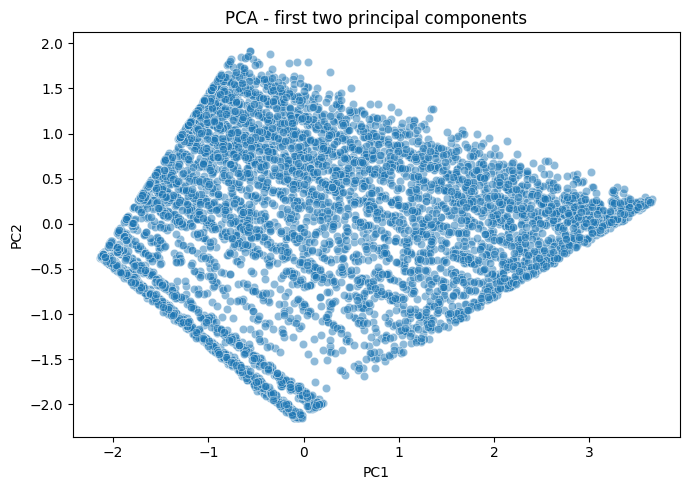

In [32]:
# Multivariate analysis - PCA on numerical features:

x = df[num_cols]
scaler = StandardScaler()
xs = scaler.fit_transform(x)

pca = PCA(n_components= xs.shape[1])
pcs = pca.fit_transform(xs)

explained = pca.explained_variance_ratio_
print(f'Explained Variance Ration by Components: {explained}')

# Plotting first two PCs:
plt.figure(figsize=(7,5))
sns.scatterplot(x= pcs[:,0], y= pcs[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - first two principal components')
plt.tight_layout()
plt.show()

Insights:

- PC1 and PC2 together explain roughly 98% of the dataset’s numeric variance (0.73 + 0.25). That means nearly everything interesting about how the numeric features relate to each other is visible in this 2D PCA plot.

- Since almost all numeric variance is visible in just two components, you can confidently use this plot (and principal components) for further analysis, clustering, or visualization.

- The clean shape and lack of outlier scatter suggest the data is well-behaved after scaling, and that PCA successfully captured the main “directions” in the data’s variation.

#### 7) Statistical Tests:

##### 1)  Categorical vs Target (Chi-Square Test):

The chi-squared contingency test, or chi-squared test of independence, is a statistical test used to determine if there is a significant association between two categorical variables in a population. The test compares the observed frequencies of your data with the frequencies that would be expected if the variables were completely independent.

Key concepts: 
- Categorical variables: Variables that divide data into distinct groups, such as gender (male/female) or brand preference (brand A, brand B, brand C).
- Contingency table: Also called a cross-tabulation, this is a table that displays the frequency distribution of the two categorical variables. The rows represent the categories of one variable and the columns represent the categories of the other.
- Null hypothesis (Ho): The variables are independent. There is no relationship between them.
- Alternative hypothesis (Ha): The variables are not independent. A relationship or association exists between them.

In [33]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [34]:
# Loop for Chi-Squared Contigency Test for All Categorical Variables vs Churn:

categorical_features = df.drop('Churn', axis= 1).select_dtypes(include= ['object', 'category']).columns.tolist()

significant_cat_features = {}

for feature in categorical_features:
    
    contingency_table = pd.crosstab(index= df[feature], columns= df['Churn'])
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    if p_value < 0.05:
        significant_cat_features[feature] = {'Chi_Squared Test Statistic': chi2_stat,
                                            'p_value': p_value}

for key, value in significant_cat_features.items():
    print(f"Churn Depends Significantlly on {key} According to Chi_Squared Contingency Test (p_Value: {np.round(value['p_value'], 5)})")

Churn Depends Significantlly on Partner According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on Dependents According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on MultipleLines According to Chi_Squared Contingency Test (p_Value: 0.00357)
Churn Depends Significantlly on InternetService According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on OnlineSecurity According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on OnlineBackup According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on DeviceProtection According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on TechSupport According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on StreamingTV According to Chi_Squared Contingency Test (p_Value: 0.0)
Churn Depends Significantlly on StreamingMovies According to Chi_Squared Cont

Insight:

According to Chi_Squared Test Analysis above, Churn Depends Significantlly on Categorical Features:

- Partner
- Dependents
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod

##### 2) Numerical vs Target (t_test):

- An independent samples t-test is a statistical method used to compare the means of two separate, unrelated groups to determine if there's a statistically significant difference between them. It's a parametric test that requires the dependent variable to be continuous, the groups to be independent, and the data in each group to be approximately normally distributed with similar variances. The test calculates a t-statistic and a p-value, which helps researchers decide if the observed difference is likely due to chance or a true difference between the groups.  

- When to use it:
Use an independent samples t-test when you want to compare the average scores of two distinct and unrelated groups.

    For example:  Comparing the effectiveness of two different drugs on two different patient groups. 
                  Comparing the test scores of students who received a specific teaching method versus those who received a standard method. 

- Key Assumptions:
    - Independence: The two groups must be independent, meaning they don't influence each other. 
    - Continuity: The dependent variable you are measuring must be continuous (e.g., height, weight, score). 
    - Normality: The data in each group should be approximately normally distributed. 
    - Equal Variances (Homogeneity of Variance): The variances of the dependent variable in the two groups should be roughly equal. If this assumption is violated, a modified version of the t-test is used. 

- Hypotheses:
  - Null Hypothesis (H₀): There is no significant difference between the means of the two groups. 
  - Alternative Hypothesis (H₁): There is a significant difference between the means of the two groups.

In [35]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [36]:
# Independent Samples T Test for Numerical Features:

ttest_independent_results = {}
for feature in num_cols:

    churned_df = df[df['Churn'] == 'Yes'][feature]
    not_churned_df = df[df['Churn'] == 'No'][feature]

    test_stat, p_value = ttest_ind(a= churned_df, b= not_churned_df, equal_var= True, alternative= 'two-sided')

    ttest_independent_results[feature]= {'t_test_stat': test_stat,
                                        'p_value': p_value}

    if p_value < 0.05:
        print(f"There's a Significant difference in {feature} between Churned and Non-Churned Users (p Value: {np.round(p_value, 5)}).")

There's a Significant difference in tenure between Churned and Non-Churned Users (p Value: 0.0).
There's a Significant difference in MonthlyCharges between Churned and Non-Churned Users (p Value: 0.0).
There's a Significant difference in TotalCharges between Churned and Non-Churned Users (p Value: 0.0).


Insights:

As we can see from Analysis of T Test Results Above, All the Numerical Features Differes Significanylly Between Churned and Not-Churned Groups.